# Title - Q-learning with FrozenLake

Here we present a basic Q-learning tutorial with openAI gym - FrozenLake. The tutorial is heavily based on [this website](https://towardsdatascience.com/q-learning-for-beginners-2837b777741)

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt

env = gym.make( "FrozenLake-v1", is_slippery = False )


# Preliminaries

There are 16 states (4x4 Grid) and 4 actions, hence we need a 16 x 4 Q-Table

In [2]:
# Alternatively, the gym library can also directly g
# give us the number of states and actions using 
# "env.observation_space.n" and "env.action_space.n"
n_s     = env.observation_space.n  # = 16
n_a     = env.action_space.n       # = 4
Q_table = np.zeros( ( n_s, n_a ) )

# Let's see how it looks
print('Q-table =\n', Q_table)

Q-table =
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


# The update Rule

$$
    Q(s_t, a_t) = 
$$

Q-table before training:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Q-table after training:
[[0.      0.59049 0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.6561  0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.729   0.     ]
 [0.      0.81    0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.9     0.     ]
 [0.      0.      1.      0.     ]
 [0.      0.      0.      0.     ]]


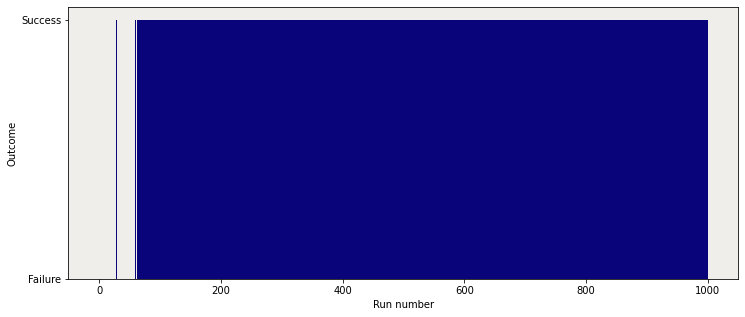

In [4]:

# Hyperparameters
episodes = 1000        # Total number of episodes
alpha    = 0.5            # Learning rate
gamma    = 0.9            # Discount factor

# List of outcomes to plot
outcomes = []

print('Q-table before training:')
print(Q_table)

# Training
for _ in range(episodes):
    state = env.reset()
    done = False

    # By default, we consider our outcome to be a failure
    outcomes.append("Failure")

    # Until the agent gets stuck in a hole or reaches the goal, keep training it
    while not done:
        # Choose the action with the highest value in the current state
        if np.max(Q_table[state]) > 0:
          action = np.argmax(Q_table[state])

        # If there's no best action (only zeros), take a random one
        else:
          action = env.action_space.sample()
             
        # Implement this action and move the agent in the desired direction
        new_state, reward, done, info = env.step(action)

        # Update Q(s,a)
        Q_table[state, action] = Q_table[state, action] + \
                                alpha * (reward + gamma * np.max(Q_table[new_state]) - Q_table[state, action])
        
        # Update our current state
        state = new_state

        # If we have a reward, it means that our outcome is a success
        if reward:
          outcomes[-1] = "Success"

print()
print('===========================================')
print('Q-table after training:')
print(Q_table)

# Plot outcomes
plt.figure(figsize=(12, 5))
plt.xlabel("Run number")
plt.ylabel("Outcome")
ax = plt.gca()
ax.set_facecolor('#efeeea')
plt.bar(range(len(outcomes)), outcomes, color="#0A047A", width=1.0)
plt.show()